In [2]:
import sys
sys.path.insert(0, '../../gempy/')
import gempy as gp
import numpy as np

gp

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


<module 'gempy' from 'c:\\Users\\Simon\\Documents\\git\\Model2Mine\\notebooks\\../../gempy\\gempy\\__init__.py'>

## Getting Orientations:

In [175]:
# Example
v1 = np.array([308.474909,76.50,79.107143])
v2 = np.array([463.84823949480227,80.09,73.39285714285721])
v = v1 - v2

a = np.degrees(np.arctan(v[0]/v[1]))
e = np.degrees(np.arctan(v[2]/v[0]))

print('azimuth = '+str(a)+', elevation = '+str(e))

azimuth = 88.6763799472806, elevation = -2.1062621550830993


In [146]:
np.rad2deg((79.107143-73.39285714285721)/(308.474909-463.84823949480227))

-2.1072114596689446

In [200]:
def get_orientation(point1, point2):
    x = np.abs(point1[0] - point2[0]) / 2 + np.min(a=[point1[0], point2[0]])
    y = np.abs(point1[1] - point2[1]) / 2 + np.min(a=[point1[1], point2[1]])
    z = np.abs(point1[2] - point2[2]) / 2 + np.min(a=[point1[2], point2[2]])

    v = point1[:3] - point2[:3]

    a = np.degrees(np.arctan(v[0]/v[1]))
    e = np.abs(np.degrees(np.arctan(v[2]/v[0])))
    if a <= 0:
        a = 360 + a

    return np.array([x, y, z, e, a, 1, point1[3]])


In [201]:
import pandas as pd

In [257]:
borehole_data = pd.read_csv('../data/DH23_24.csv')

In [258]:
Formations = borehole_data.formation.unique()

In [259]:
Formations

array(['Quaternary', 'Andesite', 'Rhyolite', 'Qtz_Porphyryie',
       'Qz-Rhyolite', 'Dacite', 'Dacite_altered'], dtype=object)

In [261]:
all_orientations = np.array([])
for i in Formations:
    formation = borehole_data.query("formation == @i")
    print(formation)
    try:
        ori = get_orientation(formation.iloc[0].values, formation.iloc[1].values)
    except IndexError:
        print("Only one Point found, continuing with next point pair.")
        pass

    all_orientations = np.append(all_orientations, ori, axis=0)

            X     Y          Z   formation
0   61.996307  51.0  85.535714  Quaternary
6  160.164003  62.0  89.107143  Quaternary
               X     Y              Z formation
1  62.7025496972  52.8  83.3928571429  Andesite
Only one Point found, continuing with next point pair.
                X      Y              Z formation
2  112.1395185103  71.24  35.5357142857  Rhyolite
4  141.0954573865  91.00  11.9642857143  Rhyolite
7  176.4075779673  65.36  61.2500000000  Rhyolite
                X      Y              Z       formation
3  124.1456395077  79.36  25.5357142857  Qtz_Porphyryie
Only one Point found, continuing with next point pair.
                X     Y              Z    formation
5  155.9265480304  95.0  -1.6071428571  Qz-Rhyolite
8  204.6572744319  81.9  14.8214285714  Qz-Rhyolite
                 X      Y               Z formation
9   239.2631526011   89.0  -34.4642857143    Dacite
11  315.5373330555  130.0 -136.6071428571    Dacite
                 X       Y              Z

In [262]:
np.rad2deg((24.1071428571-58.3928571429)/(372.7429683964-478.6793301387))

18.543460374317775

In [263]:
all_orientations.shape

(49,)

In [264]:
28/7

4.0

In [265]:
ori_df = np.reshape(all_orientations, (int(all_orientations.shape[0]/7),7))

In [266]:
oris = pd.DataFrame(ori_df, columns=["X","Y","Z","dip","azimuth","polarity","formation"])
oris.to_csv('../data/DH23_24orientations.csv', index=None)

In [267]:
oris

,X,Y,Z,dip,azimuth,polarity,formation
0,111.080155,56.5,87.3214285,2.0835530298020233,83.60649690827269,1,Quaternary
1,111.080155,56.5,87.3214285,2.0835530298020233,83.60649690827269,1,Quaternary
2,126.6174879483882,81.12,23.75,39.14712971424124,55.68974161048669,1,Rhyolite
3,126.6174879483882,81.12,23.75,39.14712971424124,55.68974161048669,1,Rhyolite
4,180.29191123116826,88.45,6.607142857142932,18.630485615567405,285.0467672435467,1,Qz-Rhyolite
5,277.40024282830313,109.5,-85.53571428571419,53.24982305152461,61.74043879072081,1,Dacite
6,277.40024282830313,109.5,-85.53571428571419,53.24982305152461,61.74043879072081,1,Dacite


## Initial Model with 2 Boreholes
The two oldest Boreholes in the Area are DH 17 and DH 18. So first, we create a Model using those two boreholes. The orientations are deduced from the input points in a first approach.

In [19]:
model2DH = gp.load_model(name='DH17_18', path='../models/DH17_18/')

Active grids: ['regular']
Active grids: ['regular' 'topography']


c:\Users\Simon\Documents\git\Model2Mine\notebooks\../../gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


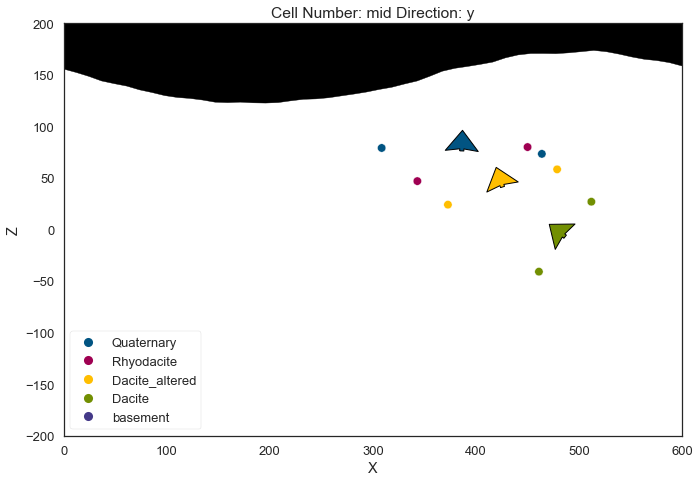

In [20]:
gp.plot_2d(model2DH, show_topography=True)

In [21]:
model2DH.surfaces

,surface,series,order_surfaces,color,id
0,Quaternary,Default series,1,#015482,1
1,Rhyodacite,Default series,2,#9f0052,2
2,Dacite_altered,Default series,3,#ffbe00,3
3,Dacite,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [22]:
model2DH.map_stack_to_surfaces({"Quaternary_series" : "Quaternary",
"Younger_series": ("Rhyodacite", "Dacite_altered"),
"Older_series": "Dacite"})

,surface,series,order_surfaces,color,id
0,Quaternary,Quaternary_series,1,#015482,1
1,Rhyodacite,Younger_series,1,#9f0052,2
2,Dacite_altered,Younger_series,2,#ffbe00,3
3,Dacite,Older_series,1,#728f02,4
4,basement,Basement,1,#443988,5


In [7]:
gp.set_interpolator(model2DH, compile_theano=True,
theano_optimizer = 'fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                            values
range              748.3314773548
$C_o$            13333.3333333333
drift equations      [3, 3, 3, 3]


In [8]:
sol17_18 = gp.compute_model(model2DH)

c:\Users\Simon\Documents\git\Model2Mine\notebooks\../../gempy\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


c:\Users\Simon\Documents\git\Model2Mine\notebooks\../../gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


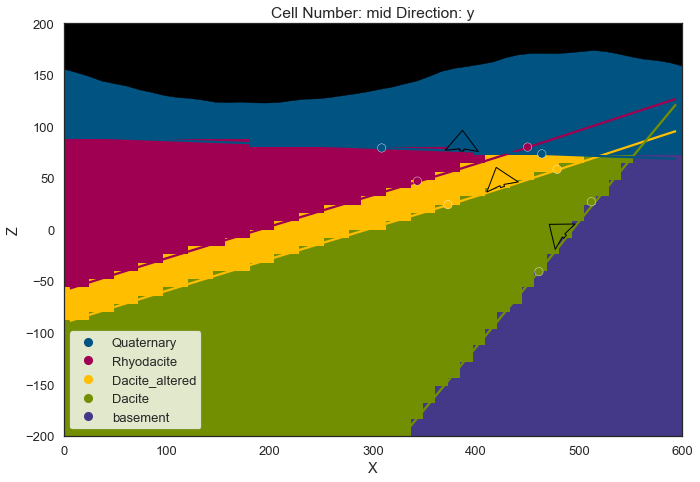

In [9]:
gp.plot_2d(model2DH, show_topography=True, show_results=True)

In [282]:
gp.plot_3d(model2DH)

## Initial Model with 3 Boreholes

In [10]:
model3DH = gp.load_model(name='DH17_18_23', path='../models/DH17_18_23/')

Active grids: ['regular']
Active grids: ['regular' 'topography']


c:\Users\Simon\Documents\git\Model2Mine\notebooks\../../gempy\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


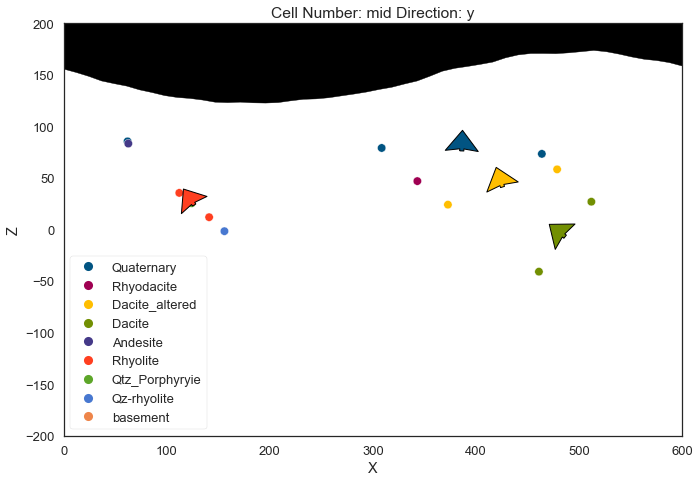

In [11]:
gp.plot_2d(model3DH, show_topography=True)

In [13]:
model3DH.surfaces

,surface,series,order_surfaces,color,id
0,Quaternary,Default series,1,#015482,1
1,Rhyodacite,Default series,2,#9f0052,2
2,Dacite_altered,Default series,3,#ffbe00,3
3,Dacite,Default series,4,#728f02,4
4,Andesite,Default series,5,#443988,5
5,Rhyolite,Default series,6,#ff3f20,6
6,Qtz_Porphyryie,Default series,7,#5DA629,7
7,Qz-rhyolite,Default series,8,#4878d0,8
8,basement,Basement,1,#ee854a,9


In [15]:
model3DH.map_stack_to_surfaces({"Quaternary_series" : "Quaternary",
"Younger_series" : ("Andesite", "Rhyolite", "Qtz_Porphyryie", "Qz-rhyolite"),
"Middle_series": ("Rhyodacite", "Dacite_altered"),
"Older_series": "Dacite"})

,surface,series,order_surfaces,color,id
0,Quaternary,Quaternary_series,1,#015482,1
4,Andesite,Younger_series,1,#443988,2
5,Rhyolite,Younger_series,2,#ff3f20,3
6,Qtz_Porphyryie,Younger_series,3,#5DA629,4
7,Qz-rhyolite,Younger_series,4,#4878d0,5
1,Rhyodacite,Middle_series,1,#9f0052,6
2,Dacite_altered,Middle_series,2,#ffbe00,7
3,Dacite,Older_series,1,#728f02,8
8,basement,Basement,1,#ee854a,9


In [23]:
gp.set_interpolator(model3DH, compile_theano=True,
theano_optimizer = 'fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                            values
range              748.3314773548
$C_o$            13333.3333333333
drift equations   [3, 3, 3, 3, 3]


In [24]:
sol17_18_23 = gp.compute_model(model3DH)

c:\Users\Simon\Documents\git\Model2Mine\notebooks\../../gempy\gempy\core\solution.py:359: UserWarning: Surfaces not computed due to: No surface found at the given iso value.. The surface is: Series: No surface found at the given iso value.; Surface Number:7
  warnings.warn('Surfaces not computed due to: ' + str(
c:\Users\Simon\Documents\git\Model2Mine\notebooks\../../gempy\gempy\core\solution.py:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.geological_map = np.array(


ValueError: Contour levels must be increasing

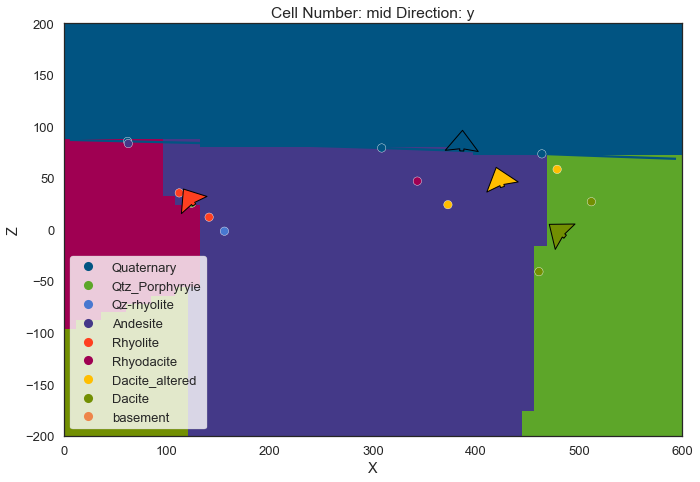

In [25]:
gp.plot_2d(model3DH, show_topography=True, show_results=True)